<a href="https://colab.research.google.com/github/andreaoa/Python_Analysis/blob/main/analysis_rent_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sn
plt.style.use('ggplot')

#Para tirar o limite de colunas e linhas exibidas
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#Problema instalando pacotes
#pip install --verbose --trusted-host=pypi.python.org --trusted-host=pypi.org --trusted-host=files.pythonhosted.org numpy

In [30]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

df = pd.read_csv(url , decimal=',', sep=';')

In [31]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [32]:
df.isna().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [33]:
df.nunique()

Tipo            22
Bairro         162
Quartos         20
Vagas           71
Suites          15
Area          1171
Valor         1414
Condominio    3811
IPTU          2765
dtype: int64

In [35]:
df.shape

(32960, 9)

In [36]:
df.Tipo.value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

In [37]:
df.Bairro.value_counts()

Barra da Tijuca             6259
Centro                      3258
Copacabana                  3186
Ipanema                     2233
Recreio dos Bandeirantes    2127
                            ... 
Cachamorra                     1
Vasco da Gama                  1
Cidade de Deus                 1
Itaguaí                        1
Sepetiba                       1
Name: Bairro, Length: 162, dtype: int64

In [38]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [42]:
df.groupby('Tipo')[['Valor']].sum().sort_values('Valor', ascending=False).head(5)

,Valor
Tipo,
Prédio Inteiro,150089809.0
Conjunto Comercial/Sala,100209460.0
Apartamento,92638601.0
Galpão/Depósito/Armazém,33272600.0
Loja/Salão,19607977.0


In [43]:
df.groupby(['Tipo', 'Bairro'], as_index=False).count()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Abolição,10,10,10,10,10,9,7
1,Apartamento,Alto da Boa Vista,3,3,3,3,3,3,2
2,Apartamento,Anchieta,4,4,4,4,4,1,0
3,Apartamento,Andaraí,92,92,92,92,92,91,62
4,Apartamento,Anil,56,56,56,56,56,51,33
...,...,...,...,...,...,...,...,...,...
961,Terreno Padrão,Vargem Grande,1,1,1,1,1,0,0
962,Terreno Padrão,Vargem Pequena,3,3,3,3,3,0,2
963,Terreno Padrão,Vigário Geral,3,3,3,3,3,0,2
964,Terreno Padrão,Vila Isabel,1,1,1,1,1,0,1


In [44]:
df.groupby(['Tipo', 'Bairro'], as_index=False)[['Valor']].count().sort_values('Valor', ascending=False)

,Tipo,Bairro,Valor
8,Apartamento,Barra da Tijuca,3340
487,Conjunto Comercial/Sala,Centro,2559
31,Apartamento,Copacabana,2464
61,Apartamento,Ipanema,1768
474,Conjunto Comercial/Sala,Barra da Tijuca,1766
...,...,...,...
740,Loja/Salão,Cinelândia,1
199,Casa,Higienópolis,1
459,Casa de Vila,Turiaçu,1
460,Casa de Vila,Vargem Pequena,1


In [45]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [46]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [47]:
df_res = df.query('@imoveis_comerciais not in Tipo')
df_res.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [48]:
df_res.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [50]:
df_res.isna().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            9
Condominio    1865
IPTU          6879
dtype: int64

<ipython-input-54-718a6e2d3b7c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_preco_tipo = df_res.groupby("Tipo").mean()[["Valor"]].sort_values("Valor")


<Axes: ylabel='Tipo'>

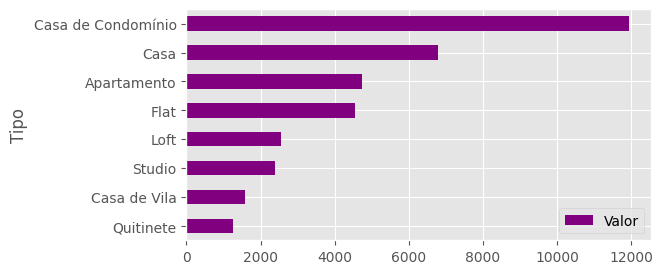

In [54]:
df_preco_tipo = df_res.groupby("Tipo").mean()[["Valor"]].sort_values("Valor")

df_preco_tipo.plot(kind='barh', figsize=(6, 3), color ='purple')


In [55]:
df_res.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,23111.000000,23111.000000,23111.000000,23111.000000,2.310200e+04,2.124600e+04,16232.000000
mean,2.483752,1.276492,0.936610,134.771278,4.970866e+03,1.648800e+03,789.994209
std,1.106639,12.942293,1.131588,144.142878,3.207941e+04,4.511732e+04,4427.156521
min,0.000000,0.000000,0.000000,10.000000,1.000000e+02,1.000000e+00,1.000000
25%,2.000000,0.000000,0.000000,63.000000,1.555000e+03,5.800000e+02,98.000000
50%,2.000000,1.000000,1.000000,89.000000,2.700000e+03,9.500000e+02,222.000000
75%,3.000000,2.000000,1.000000,150.000000,5.300000e+03,1.600000e+03,519.000000
max,32.000000,1960.000000,14.000000,3000.000000,4.500000e+06,6.552570e+06,450625.000000


In [56]:
df_res.query('Quartos >= 3')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
15,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
17,Flat,Botafogo,3,1,1,80,3800.0,1040.0,NaN
...,...,...,...,...,...,...,...,...,...
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
32947,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
32949,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0


In [72]:
df_res['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo', ascending=False)

,Tipo
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


<Axes: title={'center': 'Tipo Imóvel'}, xlabel='Tipos', ylabel='Percentual'>

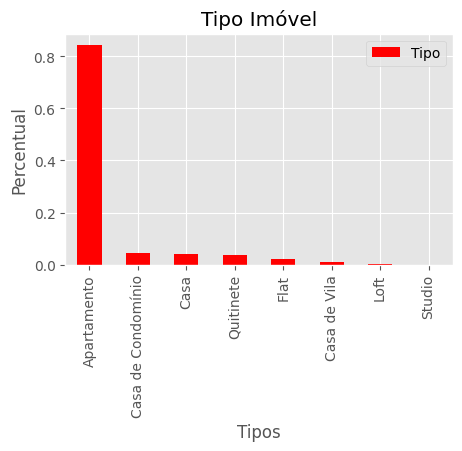

In [78]:
df_res_pct = df_res['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo', ascending=False)

df_res_pct.plot(kind='bar', figsize=(5, 3), color='red', xlabel='Tipos', ylabel='Percentual', title='Tipo Imóvel')


In [83]:
df_apt = df_res.query('Tipo == \'Apartamento\'')
df_apt.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [103]:
df_apt['Quartos'].mean()

2.481568707761622

In [104]:
len(df_apt['Bairro'].unique())

149

In [110]:
df_apt.groupby('Bairro')[['Valor']].mean().sort_values('Valor',ascending=False)

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
...,...
Inhoaíba,650.000000
Cosmos,610.000000
Santa Cruz,590.000000


<Axes: title={'center': 'Média de Alugel por Bairro'}, xlabel='Valor', ylabel='Bairro'>

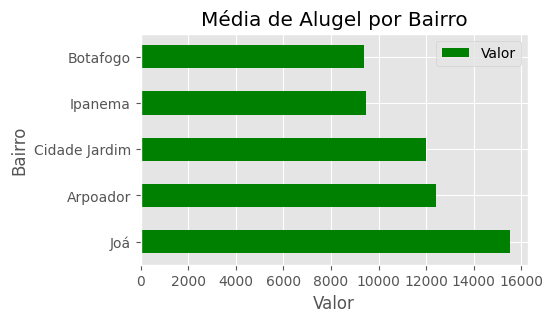

In [101]:
df_apt_valor = df_apt.groupby('Bairro')[['Valor']].mean().sort_values('Valor',ascending=False).head(5)

df_apt_valor.plot(kind='barh', figsize=(5, 3), color='green', xlabel='Valor', ylabel='Bairro', title='Média de Alugel por Bairro')

In [114]:
df_apt.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [116]:
df_apt = df_apt.fillna(0)

In [117]:
df_apt.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [118]:
df_apt.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [122]:
remover_zeros = df_apt.query('Valor == 0 | Condominio == 0').index
df_final = df_apt.drop(remover_zeros, axis=0)
df_final.shape

(18780, 9)

In [124]:
df_final.drop('Tipo', axis=1, inplace=True)
df_final.shape

(18780, 8)

In [125]:
df_final.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [131]:
flt_quartos = df_final['Quartos'] == 1
flt_valor = df_final['Valor'] < 1200

In [132]:
df_final[flt_quartos]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [133]:
df_final[flt_valor]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,0.0
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [143]:
df_final['Tem_Suite'] = df_final['Suites'].apply(lambda x: 'sim' if x>0 else 'não')
df_final.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Tem_Suite
3,Centro,1,0,0,15,800.0,390.0,20.0,não
4,Higienópolis,1,0,0,48,800.0,230.0,0.0,não
6,Cachambi,2,0,0,50,1300.0,301.0,17.0,não
11,Grajaú,2,1,0,70,1500.0,642.0,74.0,não
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,sim


In [135]:
filtro_quarto_valor = (flt_quartos) & (flt_valor)
df_final[filtro_quarto_valor]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [137]:
df_final1 = df_final[filtro_quarto_valor]
df_final1.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0


In [138]:
selecao = (df_final['Quartos'] >= 2) & (df_final['Valor'] < 3000) & (df_final['Area'] > 70)

In [140]:
df_final2 = df_final[selecao]
df_final2.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0


In [141]:
df_final.to_csv('dados_apartamentos.csv', index=False ,sep=';')
df_final1.to_csv('dados_filtro1.csv', index=False ,sep=';')
df_final2.to_csv('dados_filtro2.csv', index=False ,sep=';')

In [142]:
df_final.to_excel('dados_apartamentos.xlsx', index=False)